# Climate change as a cause of natural hazards
## Maxime Keutgen r0828809

### Table of Contents :

>#### 1. Introduction
>#### 2. Text analysis of the press coverage of recent floods in Belgium
>#### 3. Climate change as an explanation for natural disasters across time
>#### 4. Conclusion


## 1. Introduction
### 1.1 Context

Recently, Belgium and Germany have been affected by large scale dramatic floods. Natural disasters are becoming more frequent due to climate change. According to the [US Geological Survey](https://www.usgs.gov/faqs/what-are-long-term-effects-climate-change-1?qt-news_science_products=0#qt-news_science_products), climate change is expected to lead to an increase in flash floods in Europe. Scientists are working hard to predict and mitigate the impacts of these natural hazards. However, scientists' preferential way of communicating is through scientific journals, a channel esoteric to the general public.

Nevertheless, in the beginning of August 2021, the Intergovernmental Panel on Climate Change (IPCC), a United Nation's institution, published its 6th report. This is a noticable event not only for the scientific community but also for policy-makers and the general public. Indeed, since the creation of the IPCC, its reports have been [fed directly into international policy making](https://www.ipcc.ch/about/history/). This is perfectly understandable knowing that IPCC's goal is to provide to policy-makers of the globe the scientific consensus on climate change, its present and future consequences for humankind and what are the ways at our disposal to mitigate this phenomenon. 

Our work therefore wish to study the propagation of a scientific concept (climate change) through mass medias. To reach this goal, we shall act in two steps. In the first step, the floods of July 2021 in Belgium and Germany provide a case study to assess how mass media link natural hazards to systemic reasons on one hand (climate change, land erosion, poor agricultural practices) or more unique reasons (political mismanagment, dam failure, etc) on the other hand. For this purpose, we will scrap news article published in English and French and conduct a word frequency analysis.

In the second part of this work, we will focus on one single international newspaper, the *Guardian* to study whether the frequency of climate change and related expression has increased over time in articles dealing with natural hazards. 

Eventually, we hope to provide an assesment of how climate change is seen as a cause of natural disasters in the public discourse with both a longitudinal analysis from one newspaper and a cross-sectional analysis from many newspapers over a recent event which impacted Belgium and Germany. 



### 1.2 Loading packages 

This command allows autocompletion in Jupyter Notebook

In [8]:
%config Completer.use_jedi = False

Loading packages

In [9]:
# scraping libraries 
import requests
import json

# data manipulation libraries
import pandas as pd
import numpy as np

# ploting libraries 
import matplotlib.pyplot as plt
import seaborn as sns
 
# machine learning libraries
import pdtext.tf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

## 2. Text analysis of the press coverage of recent floods in Belgium
### 2.1 Getting the data

We begin by using [NewsAPI](https://newsapi.org/), an API which is an alternative to Google News API. We want to collect the news concerning floods which occured in Belgium in mid-July 2021. We scrap articles published in English and French (the latter being one of the official language of Belgium). The free version of NewsAPI is restricted to a hundred results per HTTP request.

In [29]:
# URL :

api_key = '23c80efe71bd44639e1263333db99b4e'
url_en = ('https://newsapi.org/v2/everything?'
       'q=Belgium+Flood&'
        'pageSize=100'
        '&page=100'
       'from=2021-07-15&'
       'sortBy=popularity&'
       'language=en&'  
       'apiKey='api_key)



url_fr = ('https://newsapi.org/v2/everything?'
       'q=Belgique+Inondation&'
       'from=2021-07-16&'
        'pageSize=100'
        '&page=100'
       'sortBy=popularity&'
       'language=fr&'
       'apiKey='api_key)


# Get the response from the HTTP request using the 'requests' package :


response_en = requests.get(url_en)

response_fr = requests.get(url_fr)


# Create json dictionaries 

response_json_en = response_en.json()


response_json_fr = response_fr.json()




The cell above results in "response_json_en" and response_json_fr", two json dictionnaries. We will now transform the json dictionaries to clean panda dataframes, one containing English-language articles :

In [30]:
# transform the json to panda dataframe
df_en = pd.json_normalize(response_json_en, 'articles')
# print the dataframe
df_en

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Molly Taft,The Worst European Floods in 100 Years Have Le...,"At least 120 people have died and around 1,300...",https://gizmodo.com/the-worst-european-floods-...,https://i.kinja-img.com/gawker-media/image/upl...,2021-07-16T16:00:00Z,"At least 120 people have died and around 1,300...",None,Gizmodo.com
1,https://www.facebook.com/bbcnews,Germany floods map: Where are the worst-hit ar...,"Maps, images and graphics showing the heavy ra...",https://www.bbc.co.uk/news/world-europe-57862894,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-16T16:11:03Z,By The Visual and Data Journalism TeamBBC News...,bbc-news,BBC News
2,https://www.facebook.com/bbcnews,Germany floods: How a country was taken by sur...,"Amid the despair and mounting death toll, peop...",https://www.bbc.co.uk/news/world-europe-57867773,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-16T16:04:28Z,image copyrightGetty Images\r\nimage captionTh...,bbc-news,BBC News
3,https://www.facebook.com/bbcnews,Germany floods: 'My city looks like a battlefi...,Witnesses voice their grief and horror at the ...,https://www.bbc.co.uk/news/world-europe-57862570,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-16T13:37:08Z,image captionMuch of Schuld has been reduced t...,bbc-news,BBC News
4,https://www.facebook.com/bbcnews,In pictures: Floods kill dozens in Germany and...,Record rainfall caused rivers to burst their b...,https://www.bbc.co.uk/news/world-europe-57858826,https://ichef.bbci.co.uk/news/1024/branded_new...,2021-07-16T01:37:03Z,Devastating floods have hit parts of western E...,bbc-news,BBC News
...,...,...,...,...,...,...,...,...,...
95,None,New floods hit Belgium amid stormy weather - A...,<ol><li>New floods hit Belgium amid stormy wea...,https://apnews.com/article/europe-floods-storm...,https://storage.googleapis.com/afs-prod/media/...,2021-07-24T20:19:37Z,BRUSSELS (AP) New floods have again swamped ar...,associated-press,Associated Press
96,Bojan Pancevski,"Flooding Prompts Mass Evacuations in Germany, ...",<ol><li>Flooding Prompts Mass Evacuations in G...,https://www.wsj.com/articles/flooding-prompts-...,https://images.wsj.net/im-371120/social,2021-07-17T12:43:00Z,BERLINGermany and neighboring countries were e...,the-wall-street-journal,The Wall Street Journal
97,"Weiyi Cai, Taylor Johnston, Eleanor Lutz, Tim ...",Maps Showing the Extent of the Flooding in Eur...,<ol><li>Maps Showing the Extent of the Floodin...,https://www.nytimes.com/interactive/2021/07/17...,https://static01.nyt.com/images/2021/07/17/us/...,2021-07-17T05:11:42Z,Deadly floods swept through parts of Europe th...,None,New York Times
98,Geir Moulson,"Germany defends preparation for floods, consid...",<ol><li>Germany defends preparation for floods...,https://apnews.com/article/europe-germany-floo...,https://storage.googleapis.com/afs-prod/media/...,2021-07-19T10:01:34Z,BERLIN (AP) German officials are defending the...,associated-press,Associated Press


And a second one containing French-language articles : 

In [31]:
df_fr = pd.json_normalize(response_json_fr, 'articles')
df_fr

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,AFP,Crue et pluie-inondation: Météo France place 1...,INTEMPÉRIES - Les pluies abondantes sur l’est ...,https://www.huffingtonpost.fr/entry/crue-et-pl...,https://img.huffingtonpost.com/asset/60f11f833...,2021-07-16T05:57:29Z,INTEMPÉRIES - Les pluies abondantes sur l’est ...,None,Le HuffPost
1,Le HuffPost avec AFP,Inondations en Allemagne: les dégâts à Schuld ...,"INONDATIONS - En deux jours seulement, les ino...",https://www.huffingtonpost.fr/entry/allemagne-...,https://img.huffingtonpost.com/asset/60f18c7e4...,2021-07-16T14:51:10Z,"INONDATIONS - En deux jours seulement, les ino...",None,Le HuffPost
2,None,Les inondations en Allemagne sont les plus meu...,Les inondations en Rhénanie-du-Nord-Westphalie...,https://www.courrierinternational.com/article/...,https://www.courrierinternational.com/sites/ci...,2021-07-16T15:13:31Z,Les inondations en Rhénanie-du-Nord-Westphalie...,None,Courrier International
3,None,Les inondations en Allemagne sont déjà les plu...,Les inondations en Rhénanie-du-Nord-Westphalie...,https://www.courrierinternational.com/article/...,https://www.courrierinternational.com/sites/ci...,2021-07-16T15:13:31Z,Les inondations en Rhénanie-du-Nord-Westphalie...,None,Courrier International
4,None,"Incendies, crues, chaleur : un mois de conditi...",Les changements climatiques ont provoqué en l’...,https://www.courrierinternational.com/article/...,https://www.courrierinternational.com/sites/ci...,2021-08-05T16:15:57Z,Les changements climatiques ont provoqué en le...,None,Courrier International
5,None,25 alertes ont été émises avant les inondation...,Le premier avertissement reçu par les autorité...,https://www.lesoir.be/385268/article/2021-07-2...,https://www.lesoir.be/sites/default/files/dpis...,2021-07-22T06:09:53Z,Le premier avertissement reçu par les autorité...,None,Le Soir
6,Eric Bergerolle,Voiture inondée : pourquoi la remettre en état...,Sur les dizaines de milliers de voitures inond...,https://www.challenges.fr/automobile/actu-auto...,https://www.challenges.fr/assets/img/2021/07/1...,2021-07-21T12:15:12Z,Cinq jours après les inondations catastrophiqu...,None,Challenges
7,None,L’acteur flamand Mathias Vergels aide les sini...,Il se désole notamment de voir les habitants n...,https://soirmag.lesoir.be/387154/article/2021-...,https://soirmag.lesoir.be/sites/default/files/...,2021-08-01T07:54:39Z,"Ce samedi, lacteur Mathias Vergels, très connu...",None,Le Soir
8,hommelibre,Crue extrême du Rhin : nous avons déjà vécu cela,J'ai entendu sur BFMTV que c'était le réchauff...,https://www.agoravox.fr/tribune-libre/article/...,https://www.agoravox.fr/local/cache-gd2/8fa0bf...,2021-07-19T09:04:33Z,J'ai entendu sur BFMTV que c’était le réchauff...,None,Agoravox.fr
9,None,"Intempéries : des communes inondées en Alsace,...",Plusieurs communes de l'Est de la France ont é...,https://www.francetvinfo.fr/meteo/inondations/...,https://www.francetvinfo.fr/pictures/pT24bpXZn...,2021-07-16T05:38:48Z,De fortes pluies ont continué à tomber sur l'E...,None,Francetvinfo.fr


And eventually a dataframe containing both French and English articles :

In [32]:
# create a list of dataframes
frames = [df_fr, df_en]
# concanate the dataframes using pd.concanate()  
result = pd.concat(frames)
display(result)


,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,AFP,Crue et pluie-inondation: Météo France place 1...,INTEMPÉRIES - Les pluies abondantes sur l’est ...,https://www.huffingtonpost.fr/entry/crue-et-pl...,https://img.huffingtonpost.com/asset/60f11f833...,2021-07-16T05:57:29Z,INTEMPÉRIES - Les pluies abondantes sur l’est ...,None,Le HuffPost
1,Le HuffPost avec AFP,Inondations en Allemagne: les dégâts à Schuld ...,"INONDATIONS - En deux jours seulement, les ino...",https://www.huffingtonpost.fr/entry/allemagne-...,https://img.huffingtonpost.com/asset/60f18c7e4...,2021-07-16T14:51:10Z,"INONDATIONS - En deux jours seulement, les ino...",None,Le HuffPost
2,None,Les inondations en Allemagne sont les plus meu...,Les inondations en Rhénanie-du-Nord-Westphalie...,https://www.courrierinternational.com/article/...,https://www.courrierinternational.com/sites/ci...,2021-07-16T15:13:31Z,Les inondations en Rhénanie-du-Nord-Westphalie...,None,Courrier International
3,None,Les inondations en Allemagne sont déjà les plu...,Les inondations en Rhénanie-du-Nord-Westphalie...,https://www.courrierinternational.com/article/...,https://www.courrierinternational.com/sites/ci...,2021-07-16T15:13:31Z,Les inondations en Rhénanie-du-Nord-Westphalie...,None,Courrier International
4,None,"Incendies, crues, chaleur : un mois de conditi...",Les changements climatiques ont provoqué en l’...,https://www.courrierinternational.com/article/...,https://www.courrierinternational.com/sites/ci...,2021-08-05T16:15:57Z,Les changements climatiques ont provoqué en le...,None,Courrier International
...,...,...,...,...,...,...,...,...,...
95,None,New floods hit Belgium amid stormy weather - A...,<ol><li>New floods hit Belgium amid stormy wea...,https://apnews.com/article/europe-floods-storm...,https://storage.googleapis.com/afs-prod/media/...,2021-07-24T20:19:37Z,BRUSSELS (AP) New floods have again swamped ar...,associated-press,Associated Press
96,Bojan Pancevski,"Flooding Prompts Mass Evacuations in Germany, ...",<ol><li>Flooding Prompts Mass Evacuations in G...,https://www.wsj.com/articles/flooding-prompts-...,https://images.wsj.net/im-371120/social,2021-07-17T12:43:00Z,BERLINGermany and neighboring countries were e...,the-wall-street-journal,The Wall Street Journal
97,"Weiyi Cai, Taylor Johnston, Eleanor Lutz, Tim ...",Maps Showing the Extent of the Flooding in Eur...,<ol><li>Maps Showing the Extent of the Floodin...,https://www.nytimes.com/interactive/2021/07/17...,https://static01.nyt.com/images/2021/07/17/us/...,2021-07-17T05:11:42Z,Deadly floods swept through parts of Europe th...,None,New York Times
98,Geir Moulson,"Germany defends preparation for floods, consid...",<ol><li>Germany defends preparation for floods...,https://apnews.com/article/europe-germany-floo...,https://storage.googleapis.com/afs-prod/media/...,2021-07-19T10:01:34Z,BERLIN (AP) German officials are defending the...,associated-press,Associated Press


### 2.2 Exploratory Analysis
#### 2.2.1 Francophone newspapers 

We scrapped 37 articles written in French. Here are their titles : 

In [33]:
list(df_fr['title'])

['Crue et pluie-inondation: Météo France place 13 départements du nord-est en vigilance orange',
 'Inondations en Allemagne: les dégâts à Schuld illustrent la catastrophe',
 'Les inondations en Allemagne sont les plus meurtrières en près de 60\xa0ans',
 'Les inondations en Allemagne sont déjà les plus meurtrières en près de 60\xa0ans',
 'Incendies, crues, chaleur\xa0: un mois de conditions climatiques extrêmes en images',
 '25 alertes ont été émises avant les inondations, personne n’a su prévoir l’ampleur de la catastrophe',
 'Voiture inondée : pourquoi la remettre en état coûte si cher',
 'L’acteur flamand Mathias Vergels aide les sinistrés de Pepinster et s’indigne: «On n’est pas en Bosnie, c’est incroyable»',
 'Crue extrême du Rhin : nous avons déjà vécu cela',
 'Intempéries : des communes inondées en Alsace, les pompiers multiplient les interventions en Moselle',
 'EN IMAGES. Inondations en Belgique : de violents orages font de nombreux dégâts',
 'Le bilan des intempéries en Europe

A lot of articles contain the word _"Allemagne"_ (Germany), indeed the floods of mid-July 2021 occured in both Belgium and Germany.

 We visualise with a barplot which are the newspapers who wrote the most popular articles dealing with floods in Belgium :

<Figure size 1440x1440 with 0 Axes>

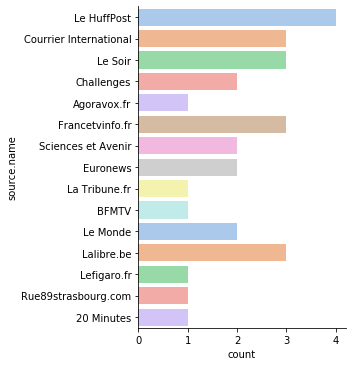

In [34]:
# set size of the figure 
plt.figure(figsize=(20,20)) 
# create categorical plot
sns.catplot(y="source.name", kind="count", palette="pastel", data=df_fr)

From this figure, one see that the newspapers which published the most popular articles concerning floods are *Le Huffington Post* and *FranceTVInfo*. This is hardly surprising knowing that These two medias are very large French media which rely on *AFP (Agence France Presse)*, the world's oldest news agency. Second to these medias are *Le Soir* and *La Libre* (amongst others) which are the two largest newspapers in French-speaking Belgium. 

#### 2.2.2 Anglophone newspapers  

<Figure size 1440x1440 with 0 Axes>

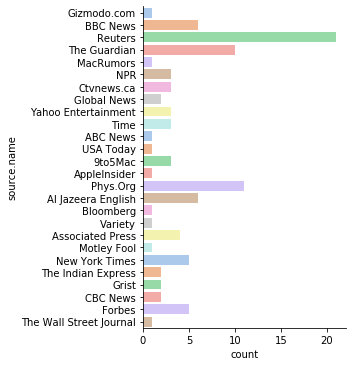

In [35]:
plt.figure(figsize=(20,20)) 
sns.catplot(y="source.name", kind="count", palette="pastel", data=df_en)

20 of the most popular articles dealing with floods in Belgium were published by *Reuters*, one of the largest news agency in the World. Major newspapers from the UK (*The Guardian, BBC News*), the US (*WSJ, NY Times, Forbes*) and from Qatar (*Al Jazeera English*) were the second most popular sources.

By construction, 100 % of articles deal with floods in Belgium since we explicitely requested them from the NewsAPI. However, it might be interresting to count how many of them mention the word 'climate' in their content. To answer this question we do as follows : 

In [36]:

climate_count_en = df_en['content'].str.contains('climat').sum()

if climate_count_en > 0:
    print ('There were {n} articles mentioning climate amongst 100 articles published in the anglophone newspapers'.format(n=climate_count_en))

There were 6 articles mentioning climate amongst 100 articles published in the anglophone newspapers


In [37]:

climate_count_fr = df_fr['content'].str.contains('climat').sum()
if climate_count_fr > 0:
    print ('There were {n} articles mentioning climate amongst 37 articles published in the francophone newspapers'.format(n=climate_count_fr))

There were 3 articles mentioning climate amongst 37 articles published in the francophone newspapers


We see that only a small number  (less than 5% of the anglophone articles and less than 10% of the francophone articles). However, there can still be articles evoking climate change using synonym (global warming, climatic variation, unusual temperatures, climate crisis, etc...) which all point to climate change. In the next section, we shall do a word frequency analysis to see if expressions equivalent to climate change were frequently used. 

### 2.3 Word frequency analysis

Let's study which are the most frequent words in the francophone and anglophone articles dealing with the floods. We need to use the pdftext.tf library.

In [38]:
from pdtext.tf import word_count
from pdtext.tf import make_wf_df

We start by creating a dataframe with the content of the articles written in English. We use the make_wf_df function which creates a wide format dataframe with the frequency of each words in the list of articles selected. We weight the frequency of each word by their rarity using the [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words) (term-frequency times inverse document-frequency) transform.

In [40]:
# transform into wide format
en_articles = make_wf_df(df_en['description'],tfidf = True)


We then look for the weighted frequency of specific key words : "global", " warming" and "climate" in a random sample of 20 English-speaking articles.

In [41]:
showme = ['global', 'warming','climate','flood']
en_articles[showme].sample(20)

,global,warming,climate,flood
46,0.0,0.0,0.000000,0.000000
49,0.0,0.0,0.000000,0.000000
56,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000
10,0.0,0.0,0.000000,0.135116
48,0.0,0.0,0.000000,0.000000
51,0.0,0.0,0.000000,0.093694
18,0.0,0.0,0.131773,0.000000
43,0.0,0.0,0.000000,0.000000
41,0.0,0.0,0.000000,0.000000


The cell above shows that the frequency of those specific key words appears to be low. For this reason, we take a more systematic approach and look at the most frequent words in the articles : 

In [42]:
en_articles.sum().sort_values(ascending=False)[:40]

the            8.009936
and            7.880853
in             7.207900
li             6.080263
to             5.678292
of             5.233123
germany        4.342544
a              3.784830
floods         3.655925
people         3.607782
s              3.533932
belgium        3.468383
on             3.400510
europe         3.351754
western        3.323514
as             3.288764
flooding       3.242201
for            3.115856
toll           2.838494
more           2.795425
from           2.767377
that           2.748215
by             2.687883
flood          2.687498
death          2.637577
at             2.568479
have           2.492159
missing        2.456094
after          2.262228
parts          2.254994
climate        2.252474
with           2.252403
were           2.235044
rescue         2.165293
least          2.105482
rivers         2.083360
has            2.052067
than           2.002453
is             1.949961
devastating    1.948380
dtype: float64

Unsurprisingly, the words with the highest frequency are uninformative words like 'the', 'and' or 'to'. Second to these are words like germany, floods, flooding, death and so forth. This being said, 'climate' appears to be a word almost as frequent as 'missing' and 'climate' is more frequent than 'river', despite the latter being an obvious causal agent of flood.

Unfortunately, we could not replicate what we have done above for the French-speaking newspapers considering the tf-idf algorithm is not available for French language

### 2.4 Conclusion

Although a naive analysis of the proportion of newspapers articles would make it look like only a small proportion (5-10 %) of articles related to the recent floods in Belgium, when we conduct a word frequency analysis, it appears that when correcting for originality of words, 'climate' appears to be no less frequent than words like 'missing' and more frequent than 'rivers'. This first analysis provides hint that climate change is a frequent word evoked in articles focused on a regional natural hazard like the recent deluges in Belgium and Germany.

## 3 Climate change as an explanation for natural disasters across time

### 3.1 Getting the data  

We formulate the following hypothesis :

    Did climate change as an explanation for natural disasters increased over time ?

We will analyze 600 news articles from the Guardian, a 200 years old newspaper renowned for the quality of its content. The Guardian provides an [API](https://open-platform.theguardian.com/) which we shall use.

We can access articles published over the last twenty years. We decided to study articles published from 2001 to 2019

We need a private key to access this API :

In [10]:

private_key = 'dc7f887b-05d9-4b9d-96d4-72d0b85453a2'

We begin by scraping all news articles published the last twenty years containing both climate change and natural disasters. These will be true predictions. The Guardian API limits the number of articles sent to 200 we thus create one request per year to increase the size of our dataset. 

The request for scraping all articles concerning both natural hazards and climate change published in 2001 is structured as follows :
> 1. from-date=2001-01-01&to-date=2001-12-31 _we want articles from 1st of January 2001 to 31th of December_
> 2. page-size=200 _we request 200 articles_
> 3. q=climate%20AND%20change%20AND%20natural%20AND%20disaster _we request articles containing the words climate change and natural disaster_


In [11]:
# list of the individual URLs
url2001_true = 'https://content.guardianapis.com/search?from-date=2001-01-01&to-date=2001-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2002_true = 'https://content.guardianapis.com/search?from-date=2002-01-01&to-date=2002-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2003_true = 'https://content.guardianapis.com/search?from-date=2003-01-01&to-date=2003-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2004_true = 'https://content.guardianapis.com/search?from-date=2004-01-01&to-date=2004-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2005_true = 'https://content.guardianapis.com/search?from-date=2005-01-01&to-date=2005-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2006_true = 'https://content.guardianapis.com/search?from-date=2006-01-01&to-date=2006-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2007_true = 'https://content.guardianapis.com/search?from-date=2007-01-01&to-date=2007-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2008_true = 'https://content.guardianapis.com/search?from-date=2008-01-01&to-date=2008-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2009_true = 'https://content.guardianapis.com/search?from-date=2009-01-01&to-date=2009-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2010_true = 'https://content.guardianapis.com/search?from-date=2010-01-01&to-date=2010-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2011_true = 'https://content.guardianapis.com/search?from-date=2011-01-01&to-date=2011-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2012_true = 'https://content.guardianapis.com/search?from-date=2012-01-01&to-date=2012-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2013_true = 'https://content.guardianapis.com/search?from-date=2013-01-01&to-date=2013-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2014_true = 'https://content.guardianapis.com/search?from-date=2014-01-01&to-date=2014-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2015_true = 'https://content.guardianapis.com/search?from-date=2015-01-01&to-date=2015-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2016_true = 'https://content.guardianapis.com/search?from-date=2016-01-01&to-date=2016-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2017_true = 'https://content.guardianapis.com/search?from-date=2017-01-01&to-date=2017-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2018_true = 'https://content.guardianapis.com/search?from-date=2018-01-01&to-date=2018-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
url2019_true = 'https://content.guardianapis.com/search?from-date=2019-01-01&to-date=2019-12-31&page-size=200&q=climate%20AND%20change%20AND%20natural%20AND%20disaster&api-key='+private_key
# Gathering the URLs in a list :
url_list_true = [url2001_true,url2002_true,url2003_true,url2004_true,url2005_true,url2006_true,url2007_true,url2008_true,url2009_true,url2010_true,url2011_true,url2012_true,url2013_true,url2014_true,url2015_true,url2016_true,url2017_true,url2018_true,url2019_true]

Then we scrap all news articles who contain the words 'natural disasters' but **not** the words 'climate change'.

In [12]:
# list of the individual URLs
url2001_false = 'https://content.guardianapis.com/search?from-date=2001-01-01&to-date=2001-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2002_false = 'https://content.guardianapis.com/search?from-date=2002-01-01&to-date=2002-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2003_false = 'https://content.guardianapis.com/search?from-date=2003-01-01&to-date=2003-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2004_false = 'https://content.guardianapis.com/search?from-date=2004-01-01&to-date=2004-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2005_false = 'https://content.guardianapis.com/search?from-date=2005-01-01&to-date=2005-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2006_false = 'https://content.guardianapis.com/search?from-date=2006-01-01&to-date=2006-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2007_false = 'https://content.guardianapis.com/search?from-date=2007-01-01&to-date=2007-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2008_false = 'https://content.guardianapis.com/search?from-date=2008-01-01&to-date=2008-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2009_false = 'https://content.guardianapis.com/search?from-date=2009-01-01&to-date=2009-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2010_false = 'https://content.guardianapis.com/search?from-date=2010-01-01&to-date=2010-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2011_false = 'https://content.guardianapis.com/search?from-date=2011-01-01&to-date=2011-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2012_false = 'https://content.guardianapis.com/search?from-date=2012-01-01&to-date=2012-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2013_false = 'https://content.guardianapis.com/search?from-date=2013-01-01&to-date=2013-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2014_false = 'https://content.guardianapis.com/search?from-date=2014-01-01&to-date=2014-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2015_false = 'https://content.guardianapis.com/search?from-date=2015-01-01&to-date=2015-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2016_false = 'https://content.guardianapis.com/search?from-date=2016-01-01&to-date=2016-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2017_false = 'https://content.guardianapis.com/search?from-date=2017-01-01&to-date=2017-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2018_false = 'https://content.guardianapis.com/search?from-date=2018-01-01&to-date=2018-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
url2019_false = 'https://content.guardianapis.com/search?from-date=2019-01-01&to-date=2019-12-31&page-size=200&q=natural%20AND%20disaster%20AND%20NOT%20climate%20AND%20NOT%20change&api-key='+private_key
# Gathering the URLs in a list :
url_list_false = [url2001_false,url2002_false,url2003_false,url2004_false,url2005_false,url2006_false,url2007_false,url2008_false,url2009_false,url2010_false,url2011_false,url2012_false,url2013_false,url2014_false,url2015_false,url2016_false,url2017_false,url2018_false,url2019_false]


We create two empty lists which will contain one json dictionary for each year.

In [13]:
list_requests_true = []
list_requests_false = []

Filling the lists of true and false dataframes :  

In [14]:
for i in range(0,19) :
    list_requests_true.append(requests.get(url_list_true[i])) 
    
for i in range(0,19) :
    list_requests_false.append(requests.get(url_list_false[i])) 

We check that the requests were successfull (200 status code)

In [15]:
print(list_requests_true)


[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [503]>]


In [16]:
print(list_requests_false)

[<Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>, <Response [200]>]


Create a list of jsons dictionaries : 

In [17]:
list_jsons_true = []
list_jsons_false = []


for i in range(0,19) :
    list_jsons_true.append(list_requests_true[i].json())
    
for i in range(0,19) :
    list_jsons_false.append(list_requests_false[i].json())

Convert the jsons dictionaries to dataframes : 

In [18]:
# create empty lists which will contain one panda dataframe for each year :
list_pandas_true = []
list_pandas_false = []
# fill the lists : 
for i in range(0,18) :    
    list_pandas_true.append(pd.json_normalize(list_jsons_true[i]['response'],record_path=['results']))

for i in range(0,18) :    
    list_pandas_false.append(pd.json_normalize(list_jsons_false[i]['response'],record_path=['results']))


Extract the yearly dataframes from the list :

In [19]:
df_true_01 = list_pandas_true[0]
df_true_02 = list_pandas_true[1]
df_true_03 = list_pandas_true[2]
df_true_04 = list_pandas_true[3]
df_true_05 = list_pandas_true[4]
df_true_06 = list_pandas_true[5]
df_true_07 = list_pandas_true[6]
df_true_08 = list_pandas_true[7]
df_true_09 = list_pandas_true[8]
df_true_10 = list_pandas_true[9]
df_true_11 = list_pandas_true[10]
df_true_12 = list_pandas_true[11]
df_true_13 = list_pandas_true[12]
df_true_14 = list_pandas_true[13]
df_true_15 = list_pandas_true[14]
df_true_16 = list_pandas_true[15]
df_true_17 = list_pandas_true[16]
df_true_18 = list_pandas_true[17]

Add a column "Target". Fill it with 1 if the news article contains the words "natural disaster" and "climate change" and fill it with 0 if the news article contains "natural disaster" but **not** "climate change". 

In [20]:
df_true_01["Target"] = 1
df_true_02["Target"] = 1 
df_true_03["Target"] = 1 
df_true_04["Target"] = 1 
df_true_05["Target"] = 1 
df_true_06["Target"] = 1 
df_true_07["Target"] = 1 
df_true_08["Target"] = 1 
df_true_09["Target"] = 1 
df_true_10["Target"] = 1 
df_true_11["Target"] = 1 
df_true_12["Target"] = 1 
df_true_13["Target"] = 1 
df_true_14["Target"] = 1 
df_true_15["Target"] = 1 
df_true_16["Target"] = 1 
df_true_17["Target"] = 1 
df_true_18["Target"] = 1 

Repeat for the "false" dataframes, begin by extract the dataframes : 

In [22]:
df_false_01 = list_pandas_false[0]
df_false_02 = list_pandas_false[1]
df_false_03 = list_pandas_false[2]
df_false_04 = list_pandas_false[3]
df_false_05 = list_pandas_false[4]
df_false_06 = list_pandas_false[5]
df_false_07 = list_pandas_false[6]
df_false_08 = list_pandas_false[7]
df_false_09 = list_pandas_false[8]
df_false_10 = list_pandas_false[9]
df_false_11 = list_pandas_false[10]
df_false_12 = list_pandas_false[11]
df_false_13 = list_pandas_false[12]
df_false_14 = list_pandas_false[13]
df_false_15 = list_pandas_false[14]
df_false_16 = list_pandas_false[15]
df_false_17 = list_pandas_false[16]
df_false_18 = list_pandas_false[17]

Then add the "Target" column and fill it with **0** this time.

In [23]:
df_false_01["Target"] = 0
df_false_02["Target"] = 0 
df_false_03["Target"] = 0 
df_false_04["Target"] = 0 
df_false_05["Target"] = 0 
df_false_06["Target"] = 0 
df_false_07["Target"] = 0 
df_false_08["Target"] = 0 
df_false_09["Target"] = 0 
df_false_10["Target"] = 0 
df_false_11["Target"] = 0 
df_false_12["Target"] = 0 
df_false_13["Target"] = 0 
df_false_14["Target"] = 0 
df_false_15["Target"] = 0 
df_false_16["Target"] = 0 
df_false_17["Target"] = 0 
df_false_18["Target"] = 0 

Finally, we merge the dataframes

In [24]:
# Create frames : 

frames_01 = [df_true_01, df_false_01] 
frames_02 = [df_true_02, df_false_02]
frames_03 = [df_true_03, df_false_03]
frames_04 = [df_true_04, df_false_04]
frames_05 = [df_true_05, df_false_05]
frames_06 = [df_true_06, df_false_06]
frames_07 = [df_true_07, df_false_07]
frames_08 = [df_true_08, df_false_08]
frames_09 = [df_true_09, df_false_09]
frames_10 = [df_true_10, df_false_10]
frames_11 = [df_true_11, df_false_11]
frames_12 = [df_true_12, df_false_12]
frames_13 = [df_true_13, df_false_13]
frames_14 = [df_true_14, df_false_14]
frames_15 = [df_true_15, df_false_15]
frames_16 = [df_true_16, df_false_16]
frames_17 = [df_true_17, df_false_17]
frames_18 = [df_true_18, df_false_18]

# Concanate frames : 
df_full01 = pd.concat(frames_01)
df_full02 = pd.concat(frames_02)
df_full03 = pd.concat(frames_03)
df_full04 = pd.concat(frames_04)
df_full05 = pd.concat(frames_05)
df_full06 = pd.concat(frames_06)
df_full07 = pd.concat(frames_07)
df_full08 = pd.concat(frames_08)
df_full09 = pd.concat(frames_09)
df_full10 = pd.concat(frames_10)
df_full11 = pd.concat(frames_11)
df_full12 = pd.concat(frames_12)
df_full13 = pd.concat(frames_13)
df_full14 = pd.concat(frames_14)
df_full15 = pd.concat(frames_15)
df_full16 = pd.concat(frames_16)
df_full17 = pd.concat(frames_17)
df_full18 = pd.concat(frames_18)

df_full_list = [df_full01,df_full02,df_full03,df_full04,df_full05,df_full06,df_full07,df_full08,df_full09,df_full10,df_full11,df_full12,df_full13,df_full14,df_full15,df_full16,df_full17,df_full18]

                



We also concanate all the dataframes together to get _df_total_ : 

In [25]:
                
frames_total = [df_full01,df_full02,df_full03,df_full04,df_full05,df_full06,df_full07,df_full08,df_full09,df_full10,df_full11,df_full12,df_full13,df_full14,df_full15,df_full16,df_full17,df_full18]                 
df_total = pd.concat(frames_total)


Our total dataset consists of 4768 different articles, we print _df_total_ :

In [26]:
df_total

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,Target
0,society/2001/dec/29/fundraising,article,society,Society,2001-12-29T12:21:48Z,Red Cross to drop disaster appeals in favour o...,https://www.theguardian.com/society/2001/dec/2...,https://content.guardianapis.com/society/2001/...,False,pillar/news,News,1
1,uk/2001/dec/29/angeliquechrisafis.timradford,article,uk-news,UK news,2001-12-29T01:30:24Z,Red Cross to drop disaster appeals,https://www.theguardian.com/uk/2001/dec/29/ang...,https://content.guardianapis.com/uk/2001/dec/2...,False,pillar/news,News,1
2,business/2001/jul/16/climatechange.environment,article,business,Business,2001-07-16T01:19:22Z,Blueprint to avert global disaster,https://www.theguardian.com/business/2001/jul/...,https://content.guardianapis.com/business/2001...,False,pillar/news,News,1
3,world/2001/jun/29/climatechange.physicalsciences,article,world,World news,2001-06-29T09:38:13Z,Disasters will outstrip aid effort as world he...,https://www.theguardian.com/world/2001/jun/29/...,https://content.guardianapis.com/world/2001/ju...,False,pillar/news,News,1
4,environment/2001/jul/14/physicalsciences.clima...,article,environment,Environment,2001-07-14T11:41:48Z,The heat is on for a solution in Bonn,https://www.theguardian.com/environment/2001/j...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,commentisfree/2018/jul/13/world-cup-united-eng...,article,commentisfree,Opinion,2018-07-13T05:00:00Z,The World Cup has united England. Enjoy it whi...,https://www.theguardian.com/commentisfree/2018...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,0
196,news/2018/jun/18/are-we-running-out-of-water,article,news,News,2018-06-18T05:00:37Z,Are we running out of water?,https://www.theguardian.com/news/2018/jun/18/a...,https://content.guardianapis.com/news/2018/jun...,False,pillar/news,News,0
197,environment/2018/oct/05/why-the-next-four-mont...,article,environment,Environment,2018-10-05T10:13:19Z,Why the next three months are crucial for the ...,https://www.theguardian.com/environment/2018/o...,https://content.guardianapis.com/environment/2...,False,pillar/news,News,0
198,commentisfree/2018/jun/03/general-election-201...,article,commentisfree,Opinion,2018-06-03T16:56:30Z,From last year’s shock election came opportuni...,https://www.theguardian.com/commentisfree/2018...,https://content.guardianapis.com/commentisfree...,False,pillar/opinion,Opinion,0


 We now have at our disposal for each year a dataframe containing news articles classified as 1 if they contain both "natural disaster" and "climate change" and classified as 0 if they only contain the words "natural disaster". 

### 3.2 Proportion of articles associating natural disasters with climate change over time 

In 2001 only 7% of articles associated natural disasters with climate change.

In [27]:
df_full01['Target'].value_counts(normalize=True) * 100



0    93.023256
1     6.976744
Name: Target, dtype: float64

In 2005 this proportion rose to 14 % 

In [28]:
df_full05['Target'].value_counts(normalize=True) * 100


0    86.206897
1    13.793103
Name: Target, dtype: float64

...then to 23 % :

In [29]:
df_full10['Target'].value_counts(normalize=True) * 100


0    76.923077
1    23.076923
Name: Target, dtype: float64

And eventually to 33 % in 2018 : 

In a more systematic fashion, we can compute the proportion of articles containing both climate change and natural disasters : 

In [30]:
prop01 =  df_full01['Target'].value_counts(normalize=True) * 100
prop02 =  df_full02['Target'].value_counts(normalize=True) * 100
prop03 =  df_full03['Target'].value_counts(normalize=True) * 100
prop04 =  df_full04['Target'].value_counts(normalize=True) * 100
prop05 =  df_full05['Target'].value_counts(normalize=True) * 100
prop06 =  df_full06['Target'].value_counts(normalize=True) * 100
prop07 =  df_full07['Target'].value_counts(normalize=True) * 100
prop08 =  df_full08['Target'].value_counts(normalize=True) * 100
prop09 =  df_full09['Target'].value_counts(normalize=True) * 100
prop10 =  df_full10['Target'].value_counts(normalize=True) * 100
prop11 =  df_full11['Target'].value_counts(normalize=True) * 100
prop12 =  df_full12['Target'].value_counts(normalize=True) * 100
prop13 =  df_full13['Target'].value_counts(normalize=True) * 100
prop14 =  df_full14['Target'].value_counts(normalize=True) * 100
prop15 =  df_full15['Target'].value_counts(normalize=True) * 100
prop16 =  df_full16['Target'].value_counts(normalize=True) * 100
prop17 =  df_full17['Target'].value_counts(normalize=True) * 100
prop18 =  df_full18['Target'].value_counts(normalize=True) * 100



Then we can bring these values together in a dataframe :

In [57]:
# vector of proportions : 
vector_prop = np.array([prop01[1],prop02[1],prop03[1],prop04[1],prop05[1],prop06[1],prop07[1],prop08[1],
               prop09[1],prop10[1],prop11[1],prop12[1],prop13[1],prop14[1],prop15[1],prop16[1],
               prop17[1],prop18[1]])
# vector of years
year = np.array([2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
# bring the two together in a panda dataframe : 
d = {'vector_prop': vector_prop, 'year': year}
df_prop = pd.DataFrame(data=d)
# print the resulting dataframe
df_prop

,vector_prop,year
0,6.976744,2001
1,6.508876,2002
2,4.306220,2003
3,7.834101,2004
4,13.793103,2005
5,16.666667,2006
6,24.812030,2007
7,26.739927,2008
8,22.480620,2009
9,23.076923,2010


We can visualize this result through a scatter plot :  

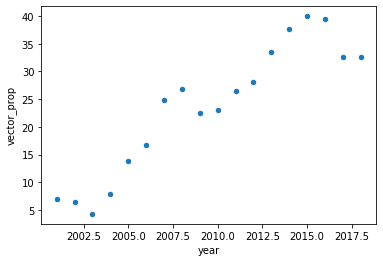

In [34]:
df_prop.plot.scatter(y="vector_prop",x="year")

The increase in proportion as time goes by is obvious, we can fit a linear trend to it. 

In [35]:
# Polynomial fit of degree 1 (linear regression) : 
d = np.polyfit(df_prop['year'],df_prop['vector_prop'],1)
f = np.poly1d(d)
# insert the regression in the dataframe 
df_prop.insert(2,'Regression',f(df_prop['year']))


And we eventually overprint the regression line (in red) over the points :

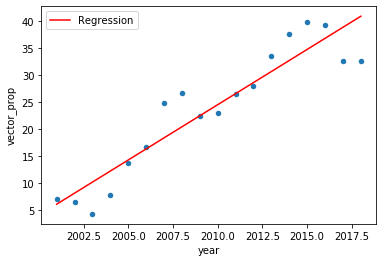

In [36]:
ax = df_prop.plot.scatter(x = 'year',y='vector_prop')
df_prop.plot(x='year', y='Regression',color='Red',ax=ax)

Clearly, we see a trend in the proportion of articles dealing with natural disasters also containing climate change, going from less than 10 before 2005 to 35-40 % in 2015-2018. This trend seems to be linear, we therefore fit a linear regression using the least squares method. 

In [37]:
model = LinearRegression().fit(year.reshape(-1, 1), vector_prop)
r_sq = model.score(year.reshape(-1, 1), vector_prop)

We can also compute the R² which is 0.86, which indicates satisfactory fit. 

In [38]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8663593937226428


### 3.3 Text Classification : predicting if articles deal with climate change based on their titles

In this section, we will craft a model to predict whether articles deal with climate change based on their titles. The dataset we are going to use is the _df_total_ dataset, which contains articles from 2001 to 2018.

This is a classification exercise, we need to classify articles as 1 if they contain 'climate change' and '0' if they do not. We want to avoid circularity so we remove the words 'climate change' from the vectorizer. We also remove words which are too common to be informative, like "the" or "and".

In [40]:
stopwords = ['climate', 'the', 'a', 'to', 'of', 'and', 'in', 'for', 
                   'that','this', 'you', 'by', 'but', 'an', 'if', 'be', 
                   'has', 'on', 'is', 'with', 'its', 'it', 'change', 'as', 'have',
                   'are']


 We use the CountVectorizer to convert the titles to a matrix of token counts. We convert to lower.case, we use .01 as the minimum threshold for the words to be included in the analysis and .8 for the max threshold.  

In [41]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             min_df      = .01,
                             max_df     = .80,
                             max_features = None,
                            stop_words=stopwords)

We split the data in 2 equal parts, a training set (to train the model) and a testing set.

In [42]:
train, test = train_test_split(df_total, test_size=0.5)

In [43]:
vectorizer.fit(train['webTitle'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=None, min_df=0.01,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['climate', 'the', 'a', 'to', 'of', 'and', 'in',
                            'for', 'that', 'this', 'you', 'by', 'but', 'an',
                            'if', 'be', 'has', 'on', 'is', 'with', 'its', 'it',
                            'change', 'as', 'have', 'are'],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [44]:
vectorizer.get_feature_names()

['about',
 'after',
 'aid',
 'all',
 'at',
 'australia',
 'back',
 'big',
 'bp',
 'britain',
 'can',
 'city',
 'could',
 'crisis',
 'deal',
 'death',
 'disaster',
 'disasters',
 'do',
 'earthquake',
 'floods',
 'food',
 'from',
 'george',
 'global',
 'green',
 'guardian',
 'happened',
 'how',
 'hurricane',
 'into',
 'john',
 'just',
 'letters',
 'live',
 'may',
 'monbiot',
 'more',
 'must',
 'natural',
 'new',
 'no',
 'not',
 'nuclear',
 'oil',
 'one',
 'or',
 'our',
 'out',
 'over',
 'people',
 'report',
 'review',
 'says',
 'scientists',
 'than',
 'time',
 'toll',
 'trump',
 'tsunami',
 'uk',
 'un',
 'up',
 'us',
 'war',
 'warming',
 'warns',
 'we',
 'what',
 'who',
 'why',
 'will',
 'world',
 'year',
 'your']

In [45]:
# Train data

title_train = vectorizer.transform(train['webTitle'])
target_train = train['Target']

# Test data

title_test = vectorizer.transform(test['webTitle'])
target_test = test['Target']


We use a _logistic regression_ classifier, with a 1000 iterations. 

In [46]:
lr_classifier = LogisticRegression(max_iter=1000)

In [47]:
lr_classifier.fit(title_train,target_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
coeficients = pd.Series(lr_classifier.coef_[0],
                        index = vectorizer.get_feature_names())

Here are the coefficients with the highest predicting value : 

In [49]:
coeficients.sort_values(ascending=True).head(50)

tsunami      -1.742539
earthquake   -1.363828
your         -0.984693
toll         -0.890934
who          -0.726486
over         -0.720073
bp           -0.602182
review       -0.505720
war          -0.477471
no           -0.431584
natural      -0.405125
city         -0.372629
after        -0.358593
nuclear      -0.330534
what         -0.324621
out          -0.271130
oil          -0.255861
aid          -0.210213
at           -0.164170
says         -0.154979
can          -0.149622
just         -0.084026
we           -0.047467
into         -0.010395
why           0.009799
about         0.022194
or            0.027374
our           0.032351
disaster      0.044696
may           0.053088
people        0.063988
un            0.067229
more          0.081833
food          0.087958
crisis        0.099551
hurricane     0.109404
deal          0.155436
letters       0.168691
us            0.180300
from          0.221018
disasters     0.242691
how           0.247069
one           0.255490
do         

Predicting values 

In [50]:
lr_classifier.fit(title_train, target_train)
lr_classifier.predict(title_test)

array([0, 0, 0, ..., 0, 0, 0])

We then add the 'prediction' column to the testing dataset.

In [51]:
test['prediction']  = lr_classifier.predict(title_test)

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


There are now in the testing dataset both the 'Target' column and the 'predicted' column. Measuring the difference between these two columns will allow us to assess the quality of our model. 

In [52]:
test

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,Target,prediction
38,football/blog/2015/dec/02/ronald-koeman-wemble...,article,football,Football,2015-12-02T22:00:39Z,Ronald Koeman falls off Wembley springboard in...,https://www.theguardian.com/football/blog/2015...,https://content.guardianapis.com/football/blog...,False,pillar/sport,Sport,0,0
147,media/2008/nov/10/newspapers-election-coverage,article,media,Media,2008-11-10T00:01:00Z,Peter Wilby on the press's US election coverage,https://www.theguardian.com/media/2008/nov/10/...,https://content.guardianapis.com/media/2008/no...,False,pillar/news,News,0,0
146,world/2015/may/10/why-i-had-return-to-nepal-ea...,article,world,World news,2015-05-10T07:00:06Z,Nepal earthquake: why I had to return to a dev...,https://www.theguardian.com/world/2015/may/10/...,https://content.guardianapis.com/world/2015/ma...,False,pillar/news,News,0,0
123,world/2005/sep/04/hurricanekatrina.usa,article,us-news,US news,2005-09-04T00:27:41Z,Focus: Aftermath of the hurricane,https://www.theguardian.com/world/2005/sep/04/...,https://content.guardianapis.com/world/2005/se...,False,pillar/news,News,0,0
116,books/2018/jan/20/the-wanderers-by-tim-pears-r...,article,books,Books,2018-01-20T09:40:18Z,The Wanderers by Tim Pears review – a hypnotic...,https://www.theguardian.com/books/2018/jan/20/...,https://content.guardianapis.com/books/2018/ja...,False,pillar/arts,Arts,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,uk/2011/jun/01/blackpool-earthquake-tremors-ga...,article,environment,Environment,2011-06-01T00:36:46Z,Blackpool earthquake tremors may have been cau...,https://www.theguardian.com/uk/2011/jun/01/bla...,https://content.guardianapis.com/uk/2011/jun/0...,False,pillar/news,News,1,0
5,technology/2011/may/08/earthquake-tsunami-earl...,article,science,Science,2011-05-07T23:04:02Z,Bill McGuire: 'A global databank could warn of...,https://www.theguardian.com/technology/2011/ma...,https://content.guardianapis.com/technology/20...,False,pillar/news,News,0,0
127,travel/2016/jan/01/2016-holiday-guide-where-to-go,article,travel,Travel,2016-01-01T07:00:25Z,Where to go on holiday in 2016,https://www.theguardian.com/travel/2016/jan/01...,https://content.guardianapis.com/travel/2016/j...,False,pillar/lifestyle,Lifestyle,1,0
55,society/2014/dec/03/hospital-childbirth-miscon...,article,society,Society,2014-12-03T00:01:11Z,Hospital births have never been safest – Nice ...,https://www.theguardian.com/society/2014/dec/0...,https://content.guardianapis.com/society/2014/...,False,pillar/news,News,0,0


We begin by computing the accuracy score of our model

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
accuracy_score(test['Target'], test['prediction'])

0.7596476510067114

Then we display the confusion matrix 

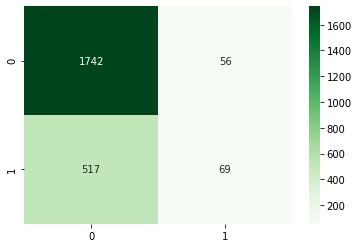

In [55]:
import seaborn as sns

cm = confusion_matrix(test['Target'], test['prediction'])
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')

The model predicts quite well, with an accuracy score above 75 %.

In [56]:
print(classification_report(test['Target'], test['prediction']))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1798
           1       0.55      0.12      0.19       586

    accuracy                           0.76      2384
   macro avg       0.66      0.54      0.53      2384
weighted avg       0.72      0.76      0.70      2384



Overall, with an accuracy of 0.76 and a precision whose weighted average is 72 %, our model fits the testing data pretty well. Nevertheless, it should be mentionned that the models is much better at predicting negative values (articles which do not contain the words climate change) than positive. This is due to our original dataset containing much more positive than negative values.   

## 4. Conclusion

Firstly, we analyzed a collection of articles from both French-speaking and English-speaking newspapers. We did not see a noticable difference between the two. Only a small proportion of them associated natural disasters to climate change. However, when looking at the overall picture, climate change was an expression used as often as causal agents like flood, this could indicate that the press is willing to associate natural disaters to climate change in the case of the recent floods which occured in Western Europe. 

In the second part of this work, we focused on one single newspapers with an international outreach, _The Guardian_ from 2001 to 2019. One of our main finding is that over the last two decades, natural disasters have been more and more associated with climate change. The evidence lies in the fact that the proportion of articles including the words climate change amongst all articles dealing with natural hazards has rose from a negligible 5 % to a staggering 40 %. 

This does differ quite a lot from the 5-10 % figure which was obtained from the first part of this work. How can one explain such a difference ? The reason may lie in the fact that a lot of the articles scraped in the first part of this work come from News Agency (_Reuters_ and _Agence France Presse_). News Agency's objective is more about bringing to their audience timely and accurate news than providing their audience a sound analysis of the recent events. This kind of press may be less interested in providing systemic explanations for events than insight-orientated newspapers like (The Guardian, The Economist, The NYT, etc..).

In the final part of this work, we build a model to predict whether an article would contain the words 'climate change' based on the title of this article. Our model, based on a logistic regression classifier had an accuracy measure of 75 % which is satisfactory.